<a href="https://colab.research.google.com/github/ceos-seo/odc-colab/blob/master/notebooks/02.10.Colab_VIIRS_Night_Lights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloads the odc-colab Python module and runs it to setup ODC.

In [15]:
!wget -nc https://raw.githubusercontent.com/ceos-seo/odc-colab/master/odc_colab.py
from odc_colab import odc_colab_init
odc_colab_init(install_odc_gee=True)

File ‘odc_colab.py’ already there; not retrieving.



Downloads an existing index and populates the new ODC environment with it.

In [16]:
from odc_colab import populate_db
populate_db()

No database file supplied. Downloading default index.
Lockfile exists, skipping population.


# Nightlight Radiance from VIIRS

This notebook demonstrates nightlight radiance measurements from VIIRS. These measurements can be used to study urban growth and loss of power from storms. The data is available as monthly mean radiance from April-2012 through December-2020 at a resolution of 15 arc-seconds (approximately 500 meters). More information about this dataset can be found [HERE](https://developers.google.com/earth-engine/datasets/catalog/NOAA_VIIRS_DNB_MONTHLY_V1_VCMCFG).

## Load Data Cube Configuration and Import Utilities

In [17]:
# Load Data Cube Configuration
from odc_gee import earthengine
dc = earthengine.Datacube(app='Nightlights')

# Import Utilities
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [4]:
products = dc.list_products()

display_columns = ["name",
                   "description",
                   "platform",
                   "instrument",
                   "crs",
                   "resolution"]

products[display_columns].sort_index()

,name,description,platform,instrument,crs,resolution
id,,,,,,
1,ls8_google,<p>This dataset is the atmospherically correct...,LANDSAT_8,OLI/TIRS,EPSG:4326,"(-0.000269493352, 0.000269493352)"
2,s1_google,<p>The Sentinel-1 mission provides data from a...,Sentinel-1A,C-SAR,EPSG:4326,"(-8.98311175e-05, 8.98311175e-05)"
3,s2_google,"<p>Sentinel-2 is a wide-swath, high-resolution...",Sentinel-2A,MSI,EPSG:4326,"(-8.98311175e-05, 8.98311175e-05)"
4,ls7_google,<p>This dataset is the atmospherically\ncorrec...,LANDSAT_7,ETM,EPSG:4326,"(-0.000269493352, 0.000269493352)"
5,viirs_google,<p>Monthly average radiance composite images u...,VIIRS,DNB,EPSG:4326,"(-0.00416666667, 0.00416666667)"


In [18]:
# Select the Product
product = 'viirs_google'

## <span id="define_extents">Define the Extents of the Analysis [&#9652;](#top)</span>

In [23]:
# MODIFY HERE

# Select the center of an analysis region (lat_long) 
# Adjust the surrounding box size (box_size) around the center (in degrees)
# Remove the comment tags (#) below to change the sample location

# Boone, NC
lat_long = (36.21, -81.67)
box_size_deg = 0.25

# Kumasi, Ghana, Africa
#lat_long = (6.69, -1.63)
#box_size_deg = 0.75

# Calculate the latitude and longitude bounds of the analysis box
latitude = (lat_long[0]-box_size_deg/2, lat_long[0]+box_size_deg/2)
longitude = (lat_long[1]-box_size_deg/2, lat_long[1]+box_size_deg/2)

# Define time window (START, END)
# Time format is (YEAR-MM)
# Range of data is 2012-04 to 2020-12
time = ('2012-04', '2020-12')

In [24]:
# The code below renders a map that can be used to view the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude,longitude)

## Load the data

In [25]:
# The loaded data is monthly mean radiance
dataset = dc.load(product=product,latitude=latitude,longitude=longitude,time=time,measurements=['avg_rad'])

In [26]:
# Plot the monthly time slice data in a table
# If there are more than 10 values, only the beginning and end will be listed
pd.DataFrame({'time': dataset.time.values})

,time
0,2012-04-01
1,2012-05-01
2,2012-06-01
3,2012-07-01
4,2012-08-01
...,...
100,2020-08-01
101,2020-09-01
102,2020-10-01
103,2020-11-01


## View the Nighlight Radiance for a selected time slice

In [31]:
# MODIFY HERE

# Select one of the time slices and create an output image. 
# Time slices are numbered from 0 to x and shown in the table above

slice = 10  # select the time slice number here

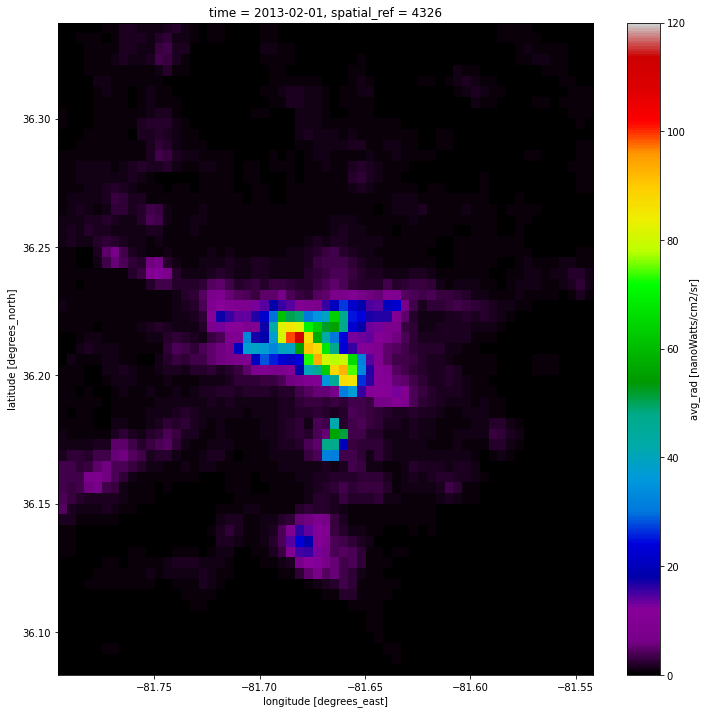

In [35]:
# Plot the mean radiance for a given time slice
# Adjust the MIN and MAX range for the data to enhance colors
# Adjust the size to fill the plotting window

dataset.isel(time=slice).avg_rad.plot.imshow(cmap=plt.cm.nipy_spectral, vmin=0, vmax=120, size=12,
                                                      aspect=dataset.dims['longitude']/dataset.dims['latitude']);

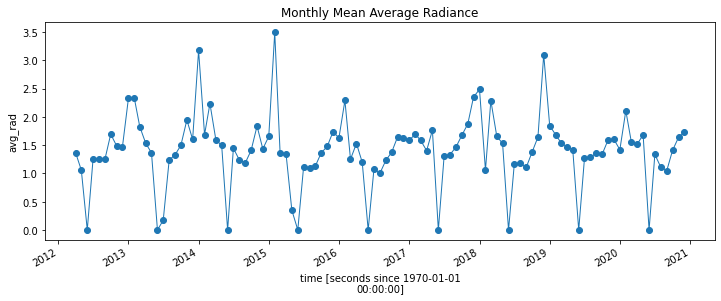

In [30]:
# Plot mean monthly radiance

# Some data may show "zero" radiance which means there are no datasets
# Some data may be skewed high or low due to cloud contamination of part of the scene

img = dataset['avg_rad'].mean(dim=['longitude','latitude']).plot(figsize=(12,4)
                                                                      ,marker='o',markersize=6,linewidth=1)
img[0].axes.set_title("Monthly Mean Average Radiance");